In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Load the dataset
file_path = "C:\\Data science\\Projects\\Bankruptcy (2).xlsx"
data = pd.read_excel(file_path)

In [16]:
# Display the first few rows of the dataset to understand its structure
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [17]:
data.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [18]:
# Check the total number of duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows is : {duplicate_rows}")


Number of duplicate rows is : 147


In [19]:
# Drop duplicate rows (if any) from the dataframe
data = data.drop_duplicates()

# Check if duplicates were removed successfully
print(f"Data after dropping duplicates: {data.shape}")
print({data.info()})

Data after dropping duplicates: (103, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        103 non-null    float64
 1   management_risk        103 non-null    float64
 2   financial_flexibility  103 non-null    float64
 3   credibility            103 non-null    float64
 4   competitiveness        103 non-null    float64
 5   operating_risk         103 non-null    float64
 6   class                  103 non-null    object 
dtypes: float64(6), object(1)
memory usage: 6.4+ KB
{None}


In [20]:
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       industrial_risk  management_risk  financial_flexibility  credibility  \
count       103.000000       103.000000             103.000000   103.000000   
mean          0.485437         0.563107               0.504854     0.582524   
std           0.404971         0.412308               0.405206     0.377668   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.000000               0.000000     0.500000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               1.000000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       103.000000      103.000000  
mean          0.640777        0.514563  
std           0.410747        0.439788  
min           0.000000        0.000000  
25%           0.500000        0.000000  
50%           1.000000

In [21]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [22]:
# Define the columns to check for outliers
num_col = data.select_dtypes(include = ['float64']).columns

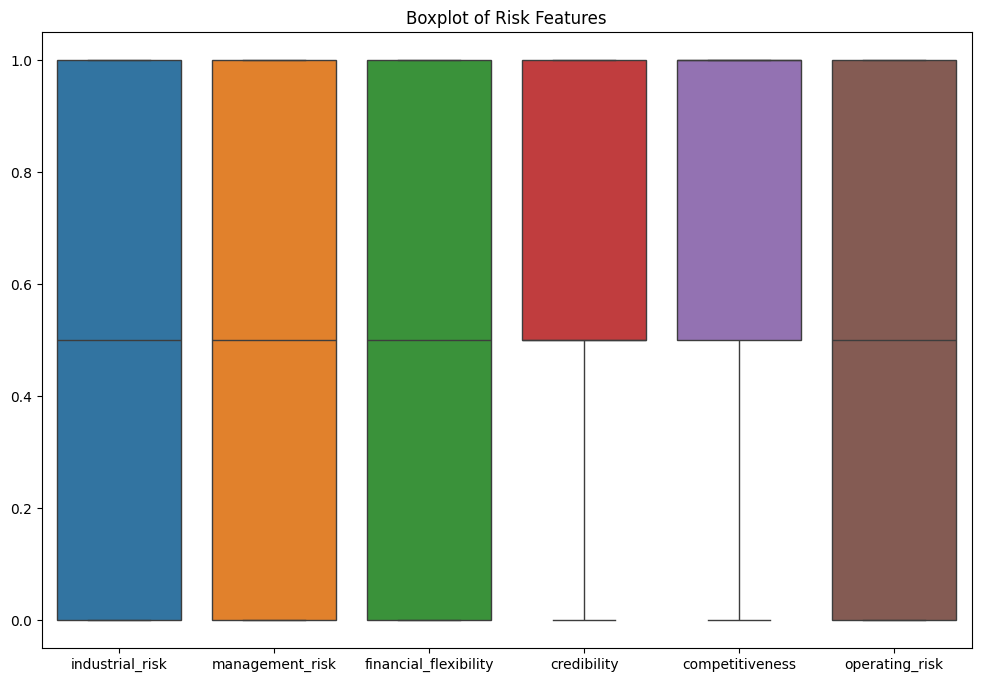

In [24]:
# Create boxplots to visualize the distribution of each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[num_col], orient="v")
plt.title('Boxplot of Risk Features')
plt.show()

In [25]:
# Calculate IQR for each feature to identify potential outliers
Q1 = data[num_col].quantile(0.25)
Q3 = data[num_col].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers based on the 1.5*IQR rule
outliers = ((data[num_col] < (Q1 - 1.5 * IQR)) | (data[num_col] > (Q3 + 1.5 * IQR))).sum()

outliers 

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
dtype: int64

In [26]:
IQR = (Q3- Q1)/2
print("IQR: ", IQR)
Upper = Q3+1.5*IQR
lower =  Q1-1.5*IQR  
[lower,Upper]

IQR:  industrial_risk          0.50
management_risk          0.50
financial_flexibility    0.50
credibility              0.25
competitiveness          0.25
operating_risk           0.50
dtype: float64


[industrial_risk         -0.750
 management_risk         -0.750
 financial_flexibility   -0.750
 credibility              0.125
 competitiveness          0.125
 operating_risk          -0.750
 dtype: float64,
 industrial_risk          1.750
 management_risk          1.750
 financial_flexibility    1.750
 credibility              1.375
 competitiveness          1.375
 operating_risk           1.750
 dtype: float64]

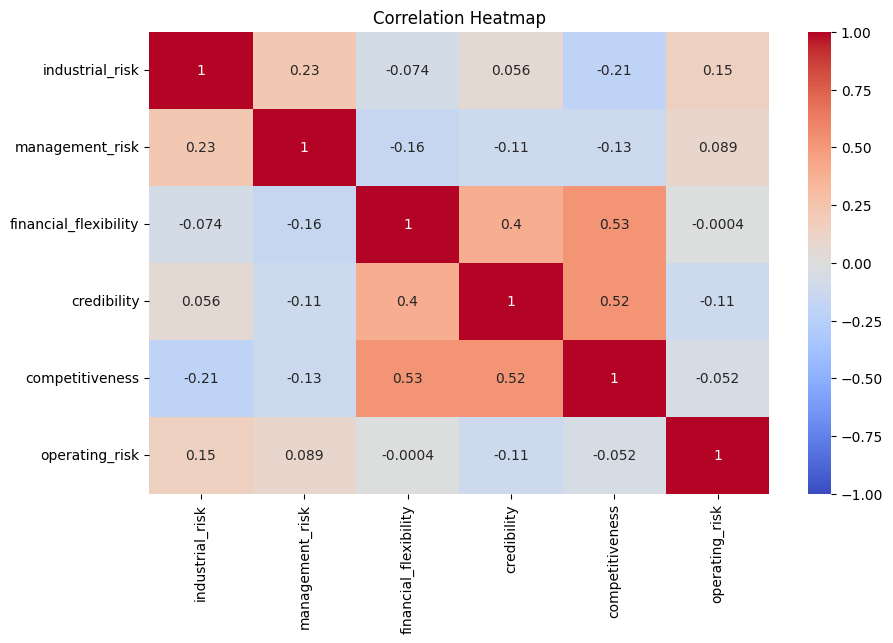

In [10]:
# Correlation matrix (excluding the 'class' column)
correlation_matrix = data.drop('class', axis=1).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

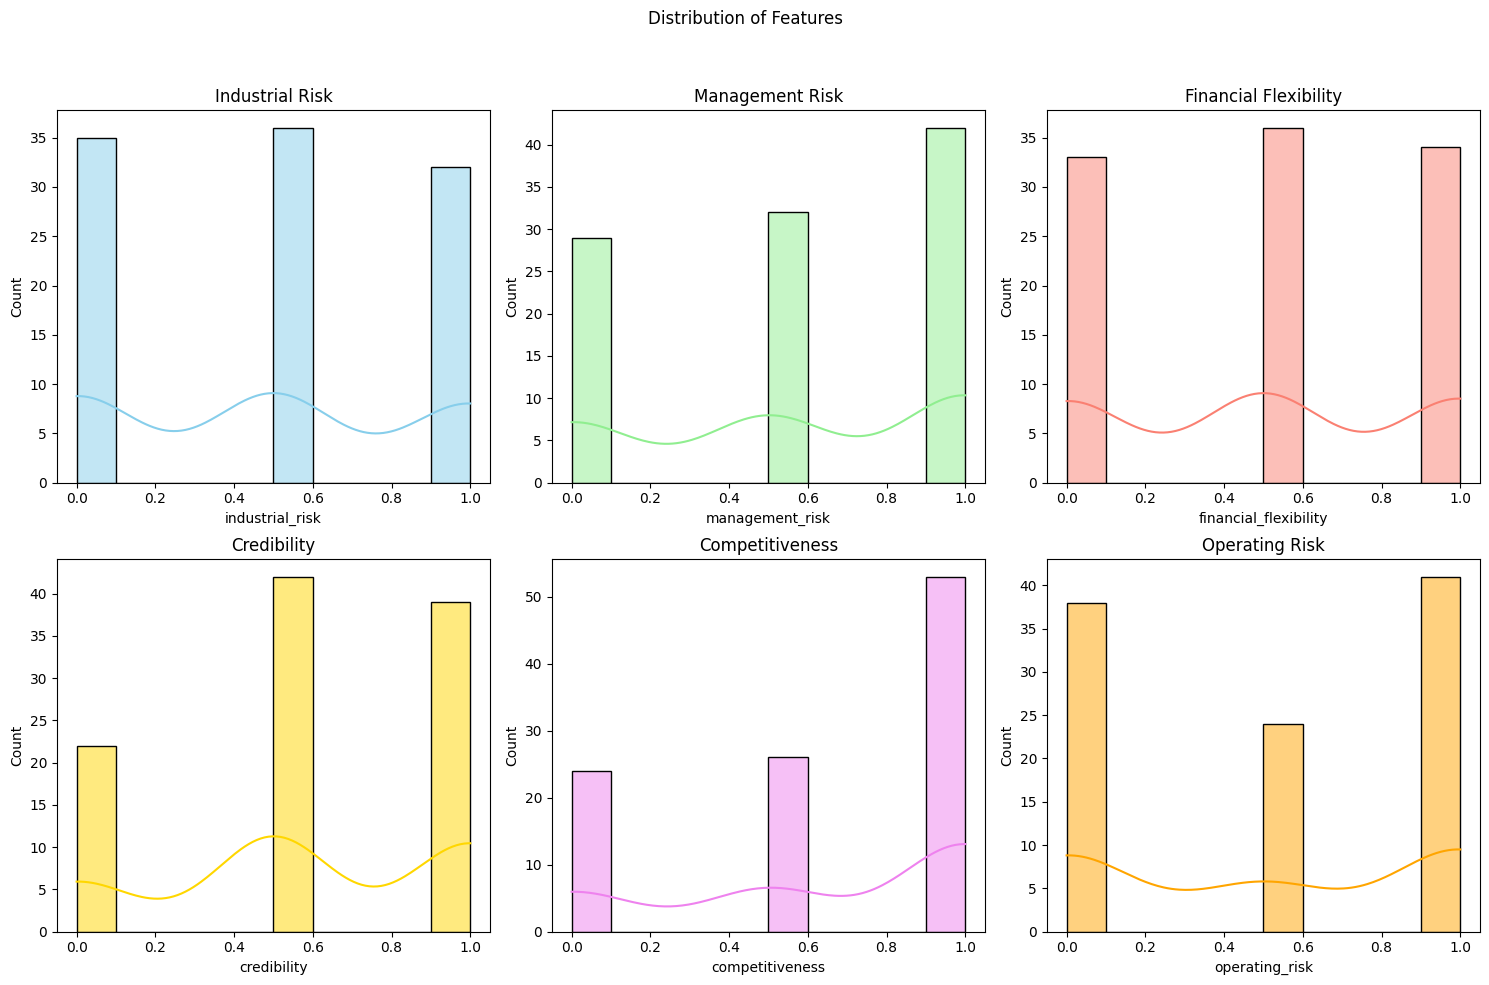

In [11]:
# Visualizations
# Plotting distribution of features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Features')

sns.histplot(data['industrial_risk'], ax=axes[0, 0], kde=True, bins=10, color='skyblue').set_title('Industrial Risk')
sns.histplot(data['management_risk'], ax=axes[0, 1], kde=True, bins=10, color='lightgreen').set_title('Management Risk')
sns.histplot(data['financial_flexibility'], ax=axes[0, 2], kde=True, bins=10, color='salmon').set_title('Financial Flexibility')
sns.histplot(data['credibility'], ax=axes[1, 0], kde=True, bins=10, color='gold').set_title('Credibility')
sns.histplot(data['competitiveness'], ax=axes[1, 1], kde=True, bins=10, color='violet').set_title('Competitiveness')
sns.histplot(data['operating_risk'], ax=axes[1, 2], kde=True, bins=10, color='orange').set_title('Operating Risk')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\jeeshan\AppData\Local\Temp\ipykernel_13992\928259744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette={'bankruptcy': 'coral', 'non-bankruptcy': 'lightblue'})


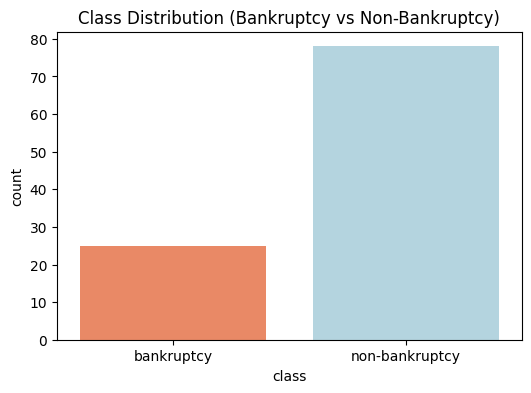

In [12]:
# Distribution of the target variable 'class'
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data, palette={'bankruptcy': 'coral', 'non-bankruptcy': 'lightblue'})
plt.title('Class Distribution (Bankruptcy vs Non-Bankruptcy)')
plt.show()


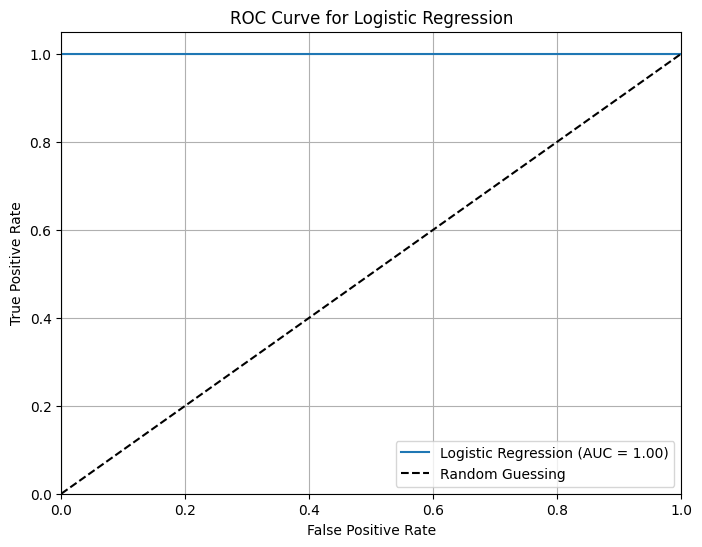

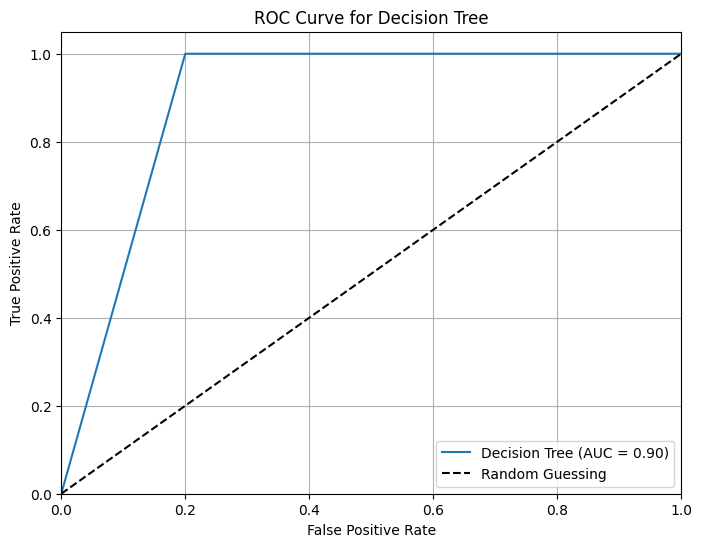

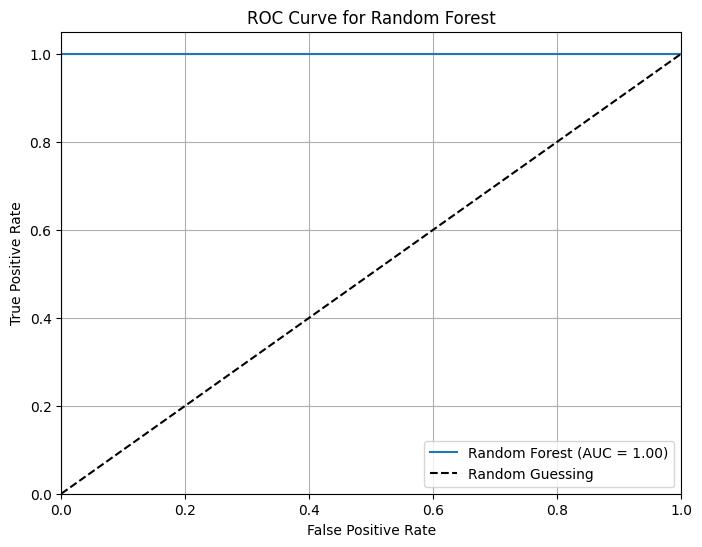

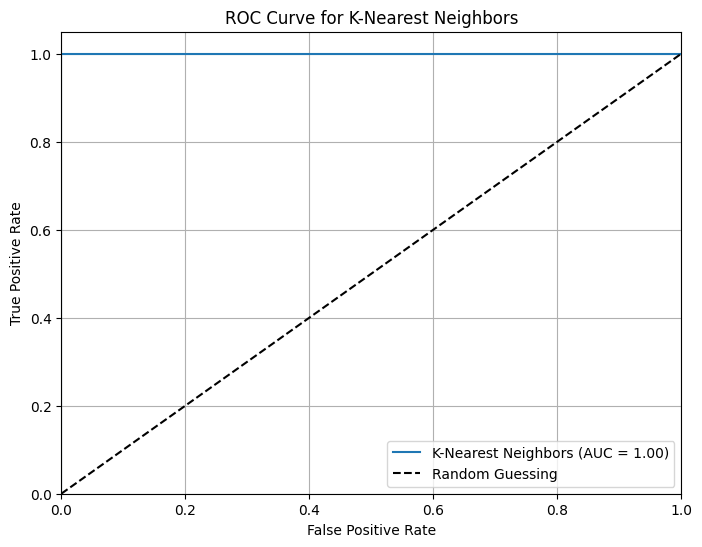

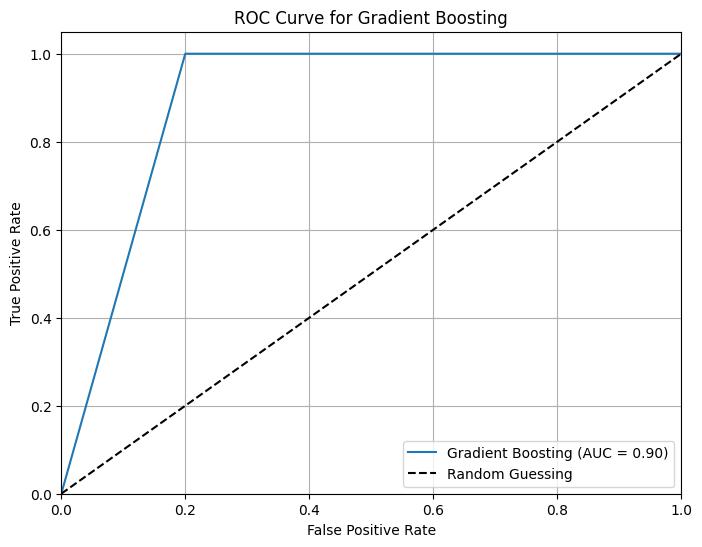

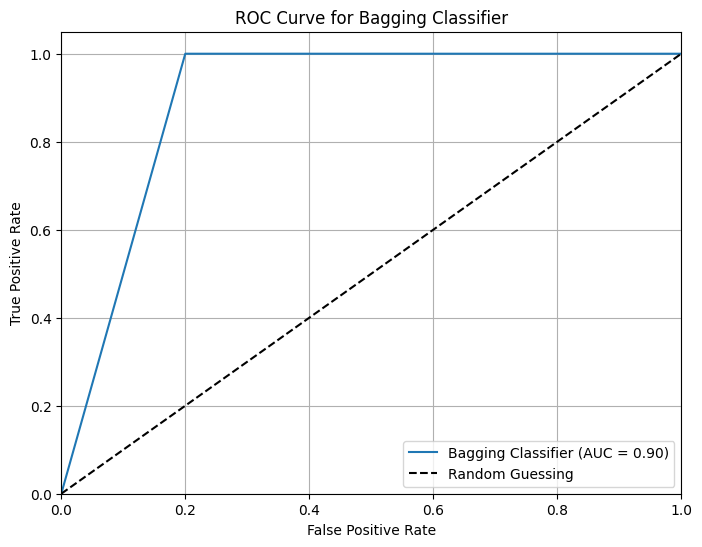

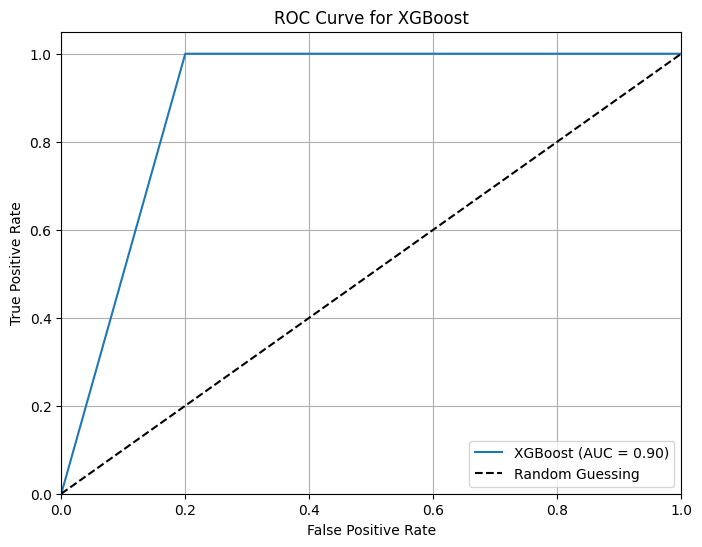

[LightGBM] [Info] Number of positive: 62, number of negative: 20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756098 -> initscore=1.131402
[LightGBM] [Info] Start training from score 1.131402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

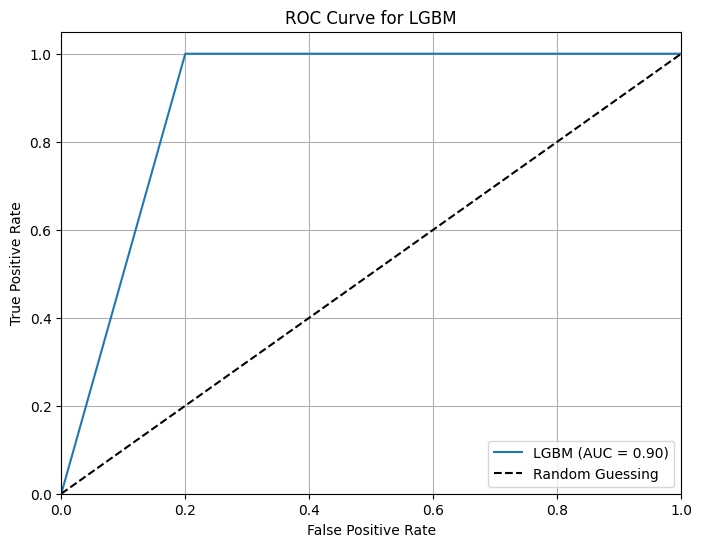

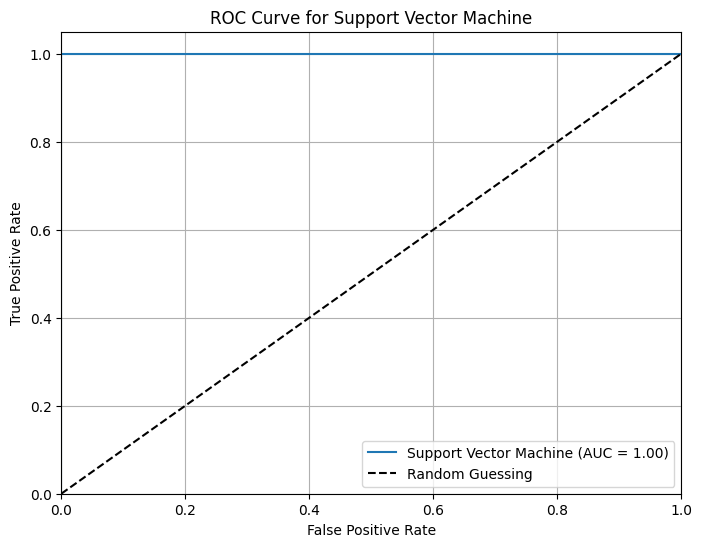

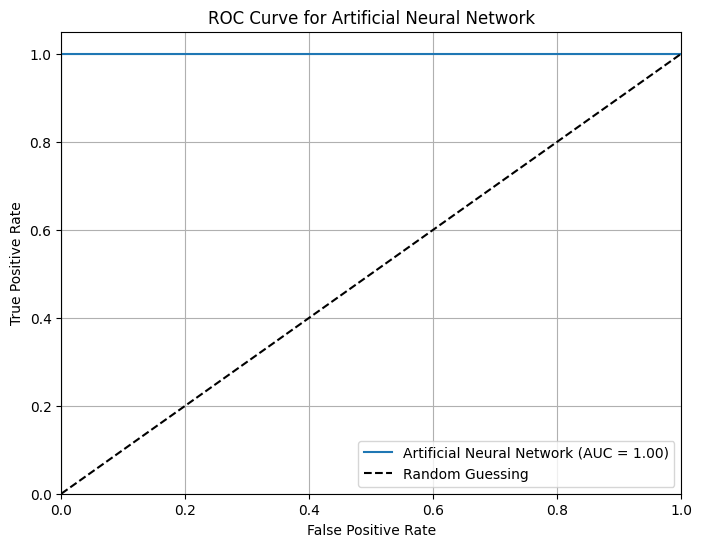

                       Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.987805       0.952381   0.941176   
1              Decision Tree        1.000000       0.952381   0.941176   
2              Random Forest        1.000000       0.952381   0.941176   
3        K-Nearest Neighbors        0.987805       1.000000   1.000000   
4          Gradient Boosting        1.000000       0.952381   0.941176   
5         Bagging Classifier        1.000000       0.952381   0.941176   
6                    XGBoost        1.000000       0.952381   0.941176   
7                       LGBM        1.000000       0.952381   0.941176   
8     Support Vector Machine        1.000000       0.952381   0.941176   
9  Artificial Neural Network        1.000000       0.952381   0.941176   

   Recall  F1 Score  ROC AUC  
0     1.0  0.969697      1.0  
1     1.0  0.969697      0.9  
2     1.0  0.969697      1.0  
3     1.0  1.000000      1.0  
4     1.0  0.969697      0.9  

In [13]:
 # Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Data science\\Projects\\Bankruptcy (2).xlsx"
data = pd.read_excel(file_path)

# Remove duplicate rows
data = data.drop_duplicates()

# Split the data into features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable 'y' to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts 'bankruptcy' to 0 and 'non-bankruptcy' to 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging Classifier': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'LGBM': lgb.LGBMClassifier(),
    'Support Vector Machine': SVC(probability=True),  # Set probability=True for ROC curve
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Create a dictionary to store evaluation results
evaluation_results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Iterate through models to fit, predict, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store metrics in the dictionary
    evaluation_results['Model'].append(model_name)
    evaluation_results['Train Accuracy'].append(train_accuracy)
    evaluation_results['Test Accuracy'].append(test_accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1 Score'].append(f1)
    evaluation_results['ROC AUC'].append(roc_auc)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Plot ROC curve for each model separately
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Convert evaluation results to DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_results)
print(evaluation_df)
